In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [26]:
%matplotlib notebook

In [64]:
L = 1
T = 3000
dT = 2
Nx = 500
a = 0.0000001

In [65]:
x = np.linspace(0, L, Nx+1)    # mesh points in space
dx = x[1] - x[0]
t = np.arange(0, T, dT)    # mesh points in time
F = a
#u   = np.zeros(Nx+1)           # unknown u at new time level
u_1 = np.zeros(Nx+1) 
dudt = np.zeros(Nx+1)
#Z2tot = np.zeros((Nx, Nt))

In [66]:
def odefunc(u_1, t, a):
    Nx = len(u_1)-1
    dudt = np.zeros(Nx+1)
    # Compute u at inner mesh points
    for i in range(1, Nx):
        dudt[0]=(u_1[Nx] - 2*u_1[0] + u_1[1])/((a/Nx)**2)
        dudt[i] = (u_1[i-1] - 2*u_1[i] + u_1[i+1])/((a/Nx)**2)
        dudt[Nx]=(u_1[Nx-1] - 2*u_1[Nx] + u_1[0])/((a/Nx)**2)
        #for i in range(0, Nx+1):
         #   u_1[i] = u_1[i] + dudt[i]

    return dudt


In [67]:

u_1[450]+=0.5
u_1[150]+=1.5
u_1[250]+=1
print(odefunc(u_1,t,a))

[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

In [ ]:
sol = odeint(odefunc, u_1, t, args = (a,))


In [ ]:
plt.figure()
plt.plot(x, sol[0,:])

<IPython.core.display.Javascript object>


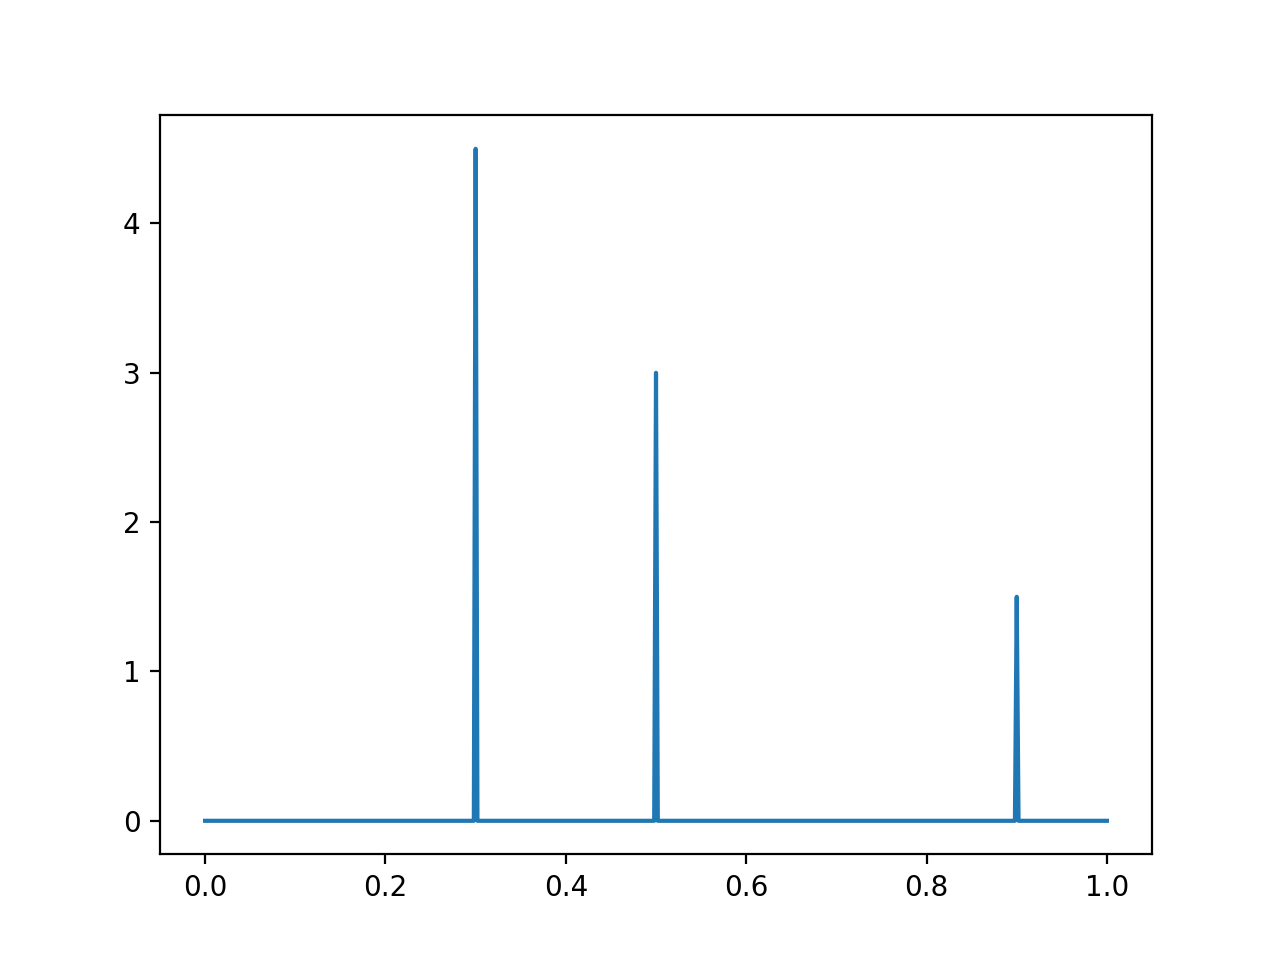

In [55]:
u_1 = sol[0,:]
u_1[450]+=0.5
u_1[150]+=1.5
u_1[250]+=1
plt.figure()
plt.plot(x, u_1)